In [1]:
from time import perf_counter as time

import numpy as np
import matplotlib.pyplot as plt

from lib.ds.segmenttree import WeightedSegmentTree
from lib.algo import compute_prefix_loss_heap, compute_left_loss_segmenttree

In [2]:
n = 100

y = np.random.rand(n)
w = np.ones(n)
l = compute_prefix_loss_heap(y, w)
l_ = compute_left_loss_segmenttree(y, w)
assert np.allclose(l, l_)

In [4]:
def plot_execution_time_comparison(sample_data, max_log_n=6):
    ns = np.logspace(max_log_n - 2, max_log_n, num=20).astype(int)

    dt_heap = []
    dt_st = []

    for n in ns:
        y, w = sample_data(n)
        t = time()
        l = compute_prefix_loss_heap(y, w)
        dt_heap.append(time() - t)
        t = time()
        l_ = compute_left_loss_segmenttree(y, w)
        dt_st.append(time() - t)

    plt.plot(ns, dt_heap)
    plt.plot(ns, dt_st)
    plt.legend(['heap', 'segment-tree'])
    plt.xlabel('n')
    plt.ylabel('execution time')
    plt.title(sample_data.__name__)
    plt.show()

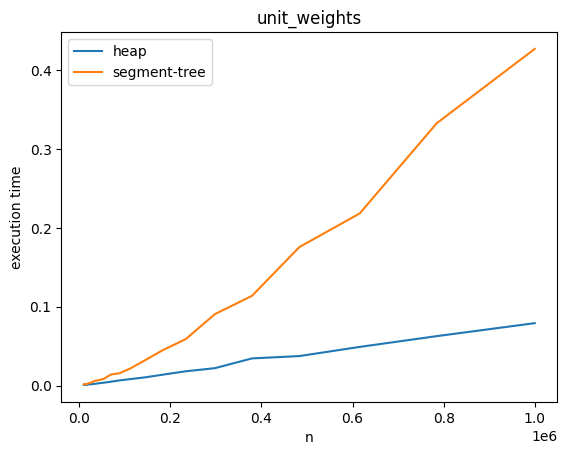

In [5]:
def unit_weights(n):
    return np.random.rand(n), np.ones(n)

plot_execution_time_comparison(unit_weights)

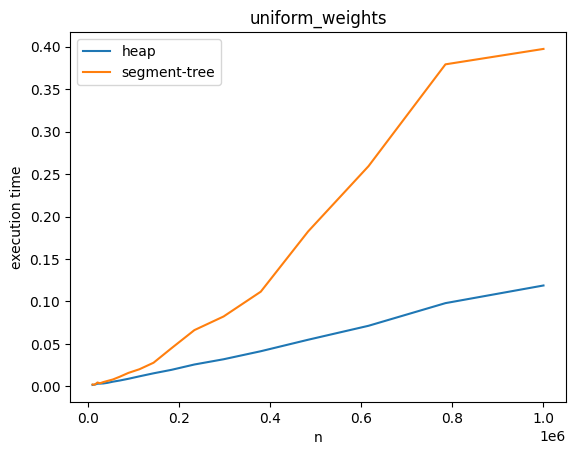

In [6]:
def uniform_weights(n):
    return np.random.rand(n), np.random.rand(n)

plot_execution_time_comparison(uniform_weights)

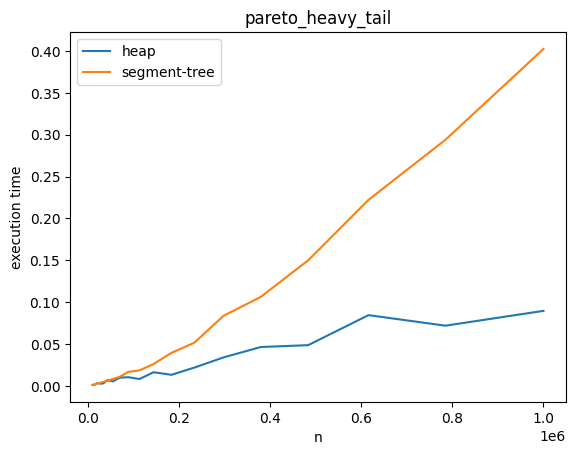

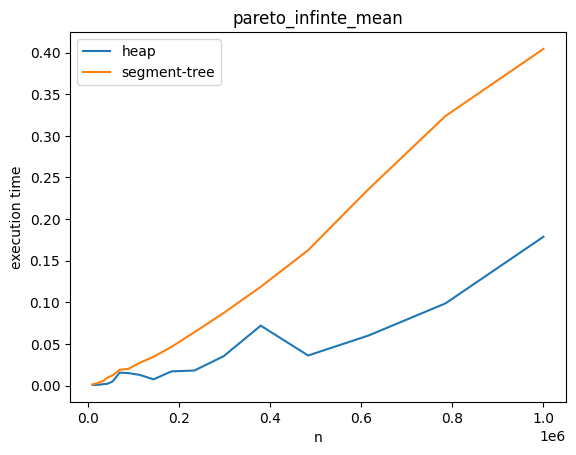

In [8]:
def pareto_heavy_tail(n):
    return np.random.rand(n), np.random.pareto(1.01, size=n)

def pareto_infinte_mean(n):
    return np.random.rand(n), np.random.pareto(0.5, size=n)


plot_execution_time_comparison(pareto_heavy_tail)
plot_execution_time_comparison(pareto_infinte_mean)

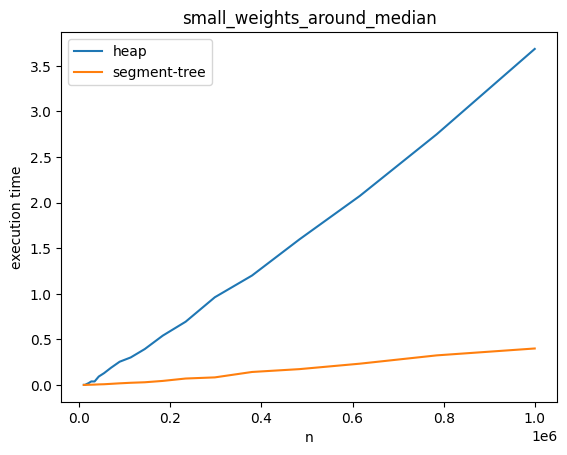

In [9]:
def small_weights_around_median(n):
    y = np.random.rand(n)
    w = np.ones(n)
    w[(0.25 < y) & (y < 0.75)] = 0.01
    return y, w

plot_execution_time_comparison(small_weights_around_median)

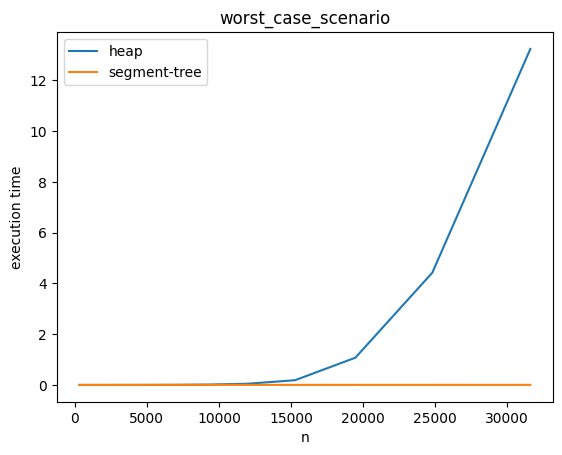

In [9]:
def worst_case_scenario(n):
    r = np.arange(n)
    y = np.power(-1.0005, r)
    w = np.power(1.0005, r)
    return y, w

plot_execution_time_comparison(worst_case_scenario, max_log_n=4.5)

In [132]:
def weighted_quantile(x: np.ndarray, w: np.ndarray, alpha: float):
    target_sum = w.sum() * alpha
    while x.size > 1:
        i = x.size // 2
        partitioner = np.argpartition(x, i)
        w_left = w[partitioner[:i]]
        sum_left = w_left.sum()
        if target_sum >= sum_left:
            target_sum -= sum_left
            x = x[partitioner[i:]]
            w = w[partitioner[i:]]
        else:
            x = x[partitioner[:i]]
            w = w_left
    return x[0]

y, w = uniform_weights(100)
weighted_quantile(y, w, alpha=0.5) == np.quantile(y, q=0.5, weights=w, method="inverted_cdf")

np.True_

In [ ]:
%%time
y, w = uniform_weights(10**6)
for _ in range(5):
    weighted_quantile(y.copy(), w.copy(), alpha=0.1)

CPU times: user 95.2 ms, sys: 973 μs, total: 96.2 ms
Wall time: 95.2 ms
